<a href="https://colab.research.google.com/github/diegoluchetti/analises_indices/blob/main/IPC_Saude_LSTMmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#LSTM - AI Recurrent Neural Network to predict Index Values.

In [2]:
#Libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import drive
plt.style.use('fivethirtyeight')

In [3]:
#Importing Data
df = pd.read_excel('/content/drive/MyDrive/pesquisaFIPE_IPC.xlsx')
#Sort Values by Date
df = df.sort_values(by='Referência', ascending=True)
#Set Date as Index
df = df.set_index('Referência')
#Show the data
df

,Valor,Ano,Mês
Referência,,,
1999-12-31,222.5579,2000,1
2000-01-31,221.8680,2000,2
2000-02-29,221.8680,2000,3
2000-03-31,222.7111,2000,4
2000-04-30,224.1587,2000,5
...,...,...,...
2021-03-31,990.5372,2021,4
2021-04-30,997.3363,2021,5
2021-05-31,1005.9522,2021,6


In [4]:
#Get the number of rows and columns
df.shape

(260, 3)

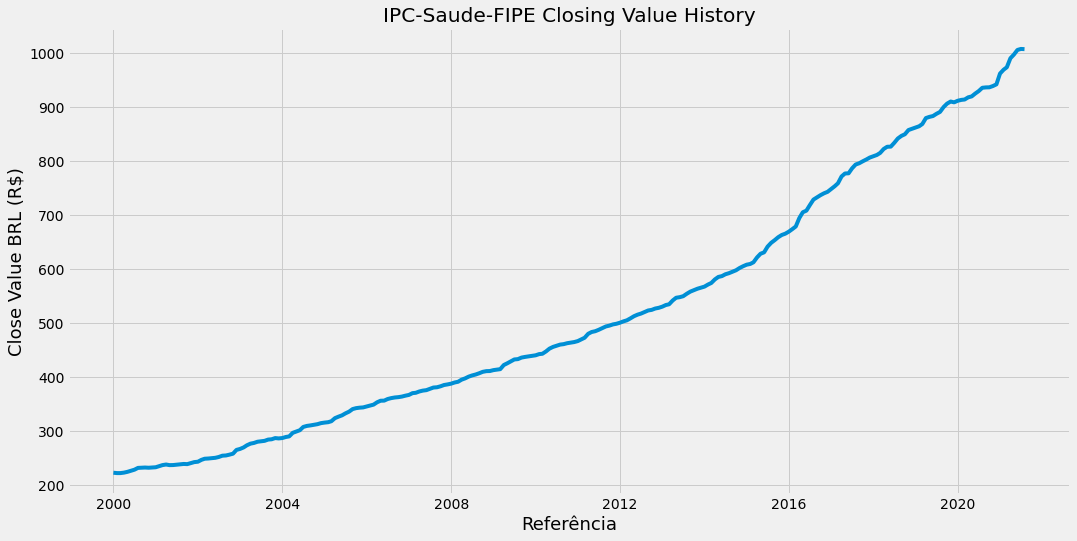

In [5]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('IPC-Saude-FIPE Closing Value History')
plt.plot(df['Valor'])
plt.xlabel('Referência', fontsize=18)
plt.ylabel('Close Value BRL (R$)', fontsize=18)
plt.show()


In [6]:
#New dataframe with only the Close Value
data = df.filter(['Valor'])
#Convert dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * .8)

training_data_len

208

In [7]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[8.77824603e-04],
       [0.00000000e+00],
       [0.00000000e+00],
       [1.07275536e-03],
       [2.91467288e-03],
       [5.45309886e-03],
       [7.98541735e-03],
       [1.22526450e-02],
       [1.26356356e-02],
       [1.31074393e-02],
       [1.26348722e-02],
       [1.31066759e-02],
       [1.37566147e-02],
       [1.63619686e-02],
       [1.88408465e-02],
       [2.01960734e-02],
       [1.87743003e-02],
       [1.89549803e-02],
       [1.98286060e-02],
       [2.09766871e-02],
       [2.15529543e-02],
       [2.11274658e-02],
       [2.36763254e-02],
       [2.59100130e-02],
       [2.68038698e-02],
       [3.12240392e-02],
       [3.38576402e-02],
       [3.43635441e-02],
       [3.52818308e-02],
       [3.60441220e-02],
       [3.79860497e-02],
       [4.10287254e-02],
       [4.15783996e-02],
       [4.34569621e-02],
       [4.57697926e-02],
       [5.46606455e-02],
       [5.69519726e-02],
       [6.05480125e-02],
       [6.55537376e-02],
       [6.94149443e-02],


In [8]:
#Create the training dataset
#Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range (60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i, 0])
  if i<=61:
    print(x_train)
    print(y_train)
    print() 


[array([0.00087782, 0.        , 0.        , 0.00107276, 0.00291467,
       0.0054531 , 0.00798542, 0.01225265, 0.01263564, 0.01310744,
       0.01263487, 0.01310668, 0.01375661, 0.01636197, 0.01884085,
       0.02019607, 0.0187743 , 0.01895498, 0.01982861, 0.02097669,
       0.02155295, 0.02112747, 0.02367633, 0.02591001, 0.02680387,
       0.03122404, 0.03385764, 0.03436354, 0.03528183, 0.03604412,
       0.03798605, 0.04102873, 0.0415784 , 0.04345696, 0.04576979,
       0.05466065, 0.05695197, 0.06054801, 0.06555374, 0.06941494,
       0.07106804, 0.07393029, 0.07489209, 0.07603521, 0.07900943,
       0.07973202, 0.08255585, 0.08175322, 0.08262697, 0.0851084 ,
       0.0865046 , 0.09495036, 0.0978929 , 0.10104857, 0.10883053,
       0.11121652, 0.11243637, 0.11393639, 0.11536287, 0.11778869])]
[0.1190689740598313]

[array([0.00087782, 0.        , 0.        , 0.00107276, 0.00291467,
       0.0054531 , 0.00798542, 0.01225265, 0.01263564, 0.01310744,
       0.01263487, 0.01310668, 0.013

In [9]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [10]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(148, 60, 1)

In [11]:
#Build the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [12]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [13]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

148/148 [==============================] - 5s 19ms/step - loss: 0.0047


In [14]:
#Create the testing dataset
#Create a new array containing scaled values from index 148 to 200
test_data = scaled_data[training_data_len -60:, :]
#Create the data sets x_tests and y_test
x_test = []
y_test = dataset[training_data_len:, :]

for i in range (60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [15]:
#Convert the data to numpy array
x_test = np.array(x_test)

In [16]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [17]:
#Get the models predict price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [18]:
#Get the root mean squared error (RMSE)
rsme = np.sqrt( np.mean(predictions - y_test)**2 )
rsme

4.392039815579934

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


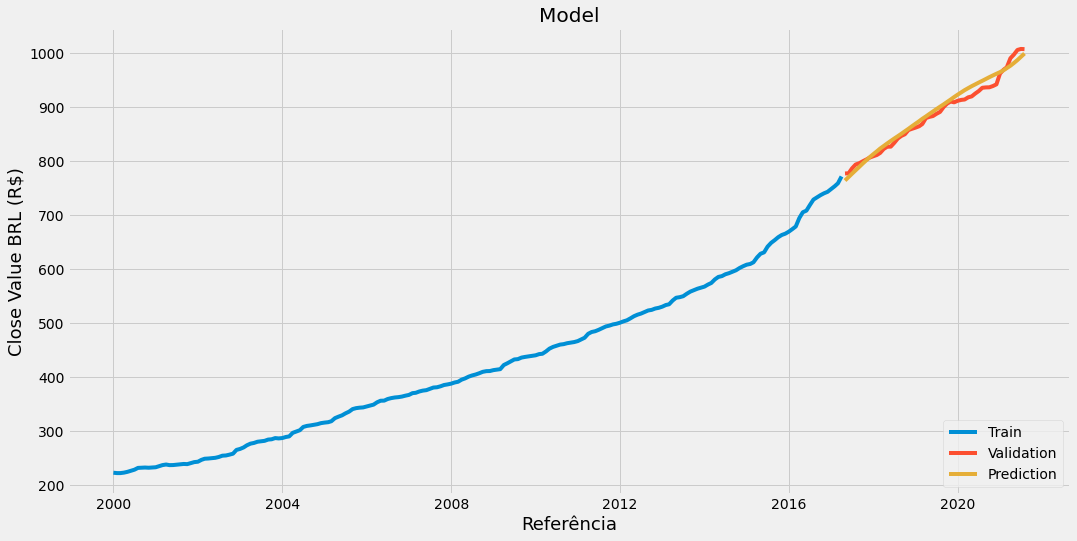

In [19]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the model
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Referência', fontsize=18)
plt.ylabel('Close Value BRL (R$)',fontsize=18)
plt.plot(train['Valor'])
plt.plot(valid[['Valor', 'Predictions']])
plt.legend(['Train', 'Validation', 'Prediction'], loc='lower right')
plt.show()

In [20]:
#Show the valid and predicted prices
valid

,Valor,Predictions
Referência,,
2017-04-30,777.0499,764.021240
2017-05-31,777.3786,770.440247
2017-06-30,786.5315,776.693848
2017-07-31,793.6291,782.955261
2017-08-31,796.0061,789.252686
2017-09-30,799.5491,795.437683
2017-10-31,802.8968,801.457947
2017-11-30,806.5211,807.268921
2017-12-31,809.0027,812.857300


In [22]:
#Get the report
indice = pd.read_excel('/content/drive/MyDrive/pesquisaFIPE_IPC.xlsx')
#Create a new dataframe
new_df = indice.filter(['Valor'])
#Get the last 60 months price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append the past 60 months
X_test.append(last_60_days_scaled)
#Convert the X_test dataset to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#Undo the Scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[240.13403]]


In [35]:
#Get the report
indice2 = pd.read_excel('/content/drive/MyDrive/pesquisaFIPE_IPC.xlsx')
#Sort Values by Date
indice2 = indice2.sort_values(by='Referência', ascending=True)
#Set Date as Index
indice2 = indice2.set_index('Referência')
#Show Value Real
indice2

,Valor,Ano,Mês
Referência,,,
1999-12-31,222.5579,2000,1
2000-01-31,221.8680,2000,2
2000-02-29,221.8680,2000,3
2000-03-31,222.7111,2000,4
2000-04-30,224.1587,2000,5
...,...,...,...
2021-03-31,990.5372,2021,4
2021-04-30,997.3363,2021,5
2021-05-31,1005.9522,2021,6


In [ ]:
#Show the Efficiency
